Estimated time: 1h 27m 26.6s

In [1]:
import tensorflow as tf

import utils
import importlib
_=importlib.reload(utils)

Time elapsed: 7.4s

# Training Parameters
Parameters with prefix "multi" are for oversampled data for multi classification

Parameters with prefix "bin" are for oversampled data with binary classification

Parameters with prefix "og_multi" are for non-oversampled data for multi classification

Parameters with prefix "og_bin" are for non-oversampled data for binary classification

In [2]:
multi_batch_size=100 
multi_epochs=30      
bin_batch_size=100 
bin_epochs=200      

og_multi_batch_size=100 
og_multi_epochs=30       
og_bin_batch_size=100 
og_bin_epochs=200      

verbosity=False
val_split=0.2

Time elapsed: 0.7s

# Import datasets
Both MITBIH and PTBDB are loaded and split into training and test sets

Data with postfix "multi" are for multi-classification.

Data with postfix "bin" are for binary-classification.

Data with prefix "og" are not oversampled

In [3]:
x_multi,x_multi_test,y_multi,y_multi_test=utils.import_set(oversampling=True,
                                                           binary_set=False)

x_bin,x_bin_test,y_bin,y_bin_test=utils.import_set(oversampling=True,
                                                   binary_set=True)

og_x_multi,og_x_multi_test,og_y_multi,og_y_multi_test=utils.import_set(oversampling=False,
                                                           binary_set=False)

og_x_bin,og_x_bin_test,og_y_bin,og_y_bin_test=utils.import_set(oversampling=False,
                                                   binary_set=True)

Time elapsed: 3m 23.6s

# Models declarations

Models with prefix "og" are without oversampling


In [4]:
model_multi_cnn=tf.keras.Sequential()
model_multi_mlp=tf.keras.Sequential()
model_bin_cnn=tf.keras.Sequential()
model_bin_mlp=tf.keras.Sequential()

utils.archi_cnn(model_multi_cnn,binary=False)
utils.archi_cnn(model_bin_cnn,binary=True)
utils.archi_mlp(model_multi_mlp,binary=False)
utils.archi_mlp(model_bin_mlp,binary=True)

og_model_multi_cnn=tf.keras.Sequential()
og_model_multi_mlp=tf.keras.Sequential()
og_model_bin_cnn=tf.keras.Sequential()
og_model_bin_mlp=tf.keras.Sequential()

utils.archi_cnn(og_model_multi_cnn,binary=False)
utils.archi_cnn(og_model_bin_cnn,binary=True)
utils.archi_mlp(og_model_multi_mlp,binary=False)
utils.archi_mlp(og_model_bin_mlp,binary=True)

Time elapsed: 4.1s

# Models optimizer and loss function declarations

## Models with oversampling

In [5]:
model_multi_cnn.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy'])
model_multi_mlp.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy'])
model_bin_cnn.compile('adam','binary_crossentropy',metrics=['accuracy'])
model_bin_mlp.compile('adam','binary_crossentropy',metrics=['accuracy'])

Time elapsed: 0.9s

## Models without oversampling

In [6]:
og_model_multi_cnn.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy'])
og_model_multi_mlp.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy'])
og_model_bin_cnn.compile('adam','binary_crossentropy',metrics=['accuracy'])
og_model_bin_mlp.compile('adam','binary_crossentropy',metrics=['accuracy'])

Time elapsed: 0.9s

# Trainning

## Multi-Classification

### With oversampling

#### Multi-Classification CNN with oversampling model training


In [7]:
res_multi_cnn=model_multi_cnn.fit(x_multi.reshape([x_multi.shape[0], 187, 1]),
                                  y_multi,batch_size=multi_batch_size,
                                  epochs=multi_epochs,verbose=verbosity,
                                  validation_split=val_split)

Time elapsed: 44m 53.9s

#### Multi-Classification MLP with oversampling model training

In [8]:
res_multi_mlp=model_multi_mlp.fit(x_multi,y_multi,batch_size=multi_batch_size,
                                  epochs=multi_epochs,verbose=verbosity,
                                  validation_split=val_split)

Time elapsed: 3m 2.6s

### Without oversampling

#### Multi-Classification CNN model training without oversampling

In [9]:
og_res_multi_cnn=og_model_multi_cnn.fit(og_x_multi.reshape([og_x_multi.shape[0], 187, 1]),
                                  og_y_multi,batch_size=og_multi_batch_size,
                                  epochs=og_multi_epochs,verbose=verbosity,
                                  validation_split=val_split)

Time elapsed: 10m 51.8s

#### Multi-Classification MLP model training without oversampling

In [10]:
og_res_multi_mlp=og_model_multi_mlp.fit(og_x_multi,og_y_multi,batch_size=og_multi_batch_size,
                                  epochs=og_multi_epochs,verbose=verbosity,
                                  validation_split=val_split)

Time elapsed: 48.5s

## Binary-Classification

### With oversampling

#### Binary-Classification CNN with oversampling model training

In [11]:
res_bin_cnn=model_bin_cnn.fit(x_bin.reshape([x_bin.shape[0], 187, 1]),
                              y_bin,batch_size=bin_batch_size,epochs=bin_epochs,
                              verbose=verbosity,validation_split=val_split)

Time elapsed: 12m 5.7s

#### Binary-Classification MLP with oversampling model training

In [12]:
res_bin_mlp=model_bin_mlp.fit(x_bin,y_bin,batch_size=bin_batch_size,
                              epochs=bin_epochs,verbose=verbosity,
                              validation_split=val_split)

Time elapsed: 1m 3.4s

### Without oversampling

#### Binary-Classification CNN model training without oversampling

In [13]:
og_res_bin_cnn=og_model_bin_cnn.fit(og_x_bin.reshape([og_x_bin.shape[0], 187, 1]),
                              og_y_bin,batch_size=og_bin_batch_size,epochs=og_bin_epochs,
                              verbose=verbosity,validation_split=val_split)

Time elapsed: 9m 59.8s

#### Binary-Classification MLP model training without oversampling

In [14]:
og_res_bin_mlp=og_model_bin_mlp.fit(og_x_bin,og_y_bin,batch_size=og_bin_batch_size,
                              epochs=og_bin_epochs,verbose=verbosity,
                              validation_split=val_split)

Time elapsed: 45.1s

# Results

## Multi-Classification Results

### With oversampling

#### Multi-Classification CNN with oversampling Model Results

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     18118
         1.0       0.77      0.57      0.65       556
         2.0       0.93      0.91      0.92      1448
         3.0       0.76      0.67      0.71       162
         4.0       0.99      0.95      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.89      0.82      0.85     21892
weighted avg       0.97      0.97      0.97     21892

Multi-Class-CNN evaluation:
loss = 0.1201113685965538
accuarcy = 0.9689841270446777


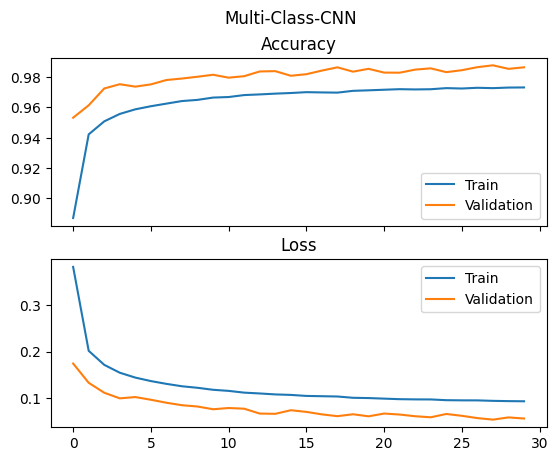

In [15]:
utils.evaluate('Multi-Class-CNN',res_multi_cnn,
                x_multi_test.reshape([x_multi_test.shape[0],187,1]),
                y_multi_test,is_multi=True,verbose=verbosity)

Time elapsed: 5.5s

#### Multi-Classification MLP with oversampling Model Results

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     18118
         1.0       0.80      0.55      0.65       556
         2.0       0.91      0.88      0.89      1448
         3.0       0.69      0.64      0.66       162
         4.0       0.98      0.93      0.95      1608

    accuracy                           0.96     21892
   macro avg       0.87      0.79      0.83     21892
weighted avg       0.96      0.96      0.96     21892

Multi-Class-MLP evaluation:
loss = 0.16283659636974335
accuarcy = 0.962360680103302


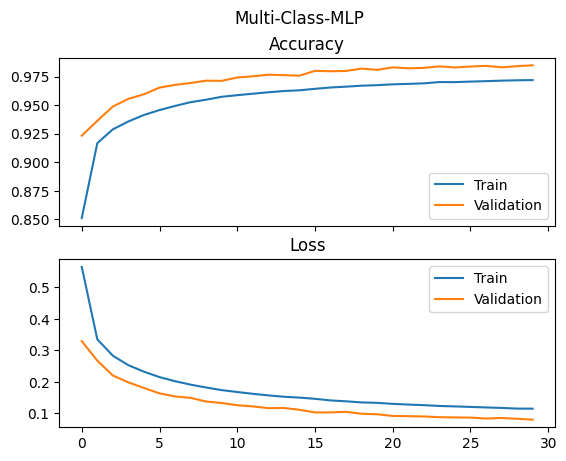

In [16]:
utils.evaluate('Multi-Class-MLP',res_multi_mlp,x_multi_test,y_multi_test,
                is_multi=True,verbose=verbosity)

Time elapsed: 2.1s

### Without oversampling

#### Multi-Classification CNN Model without oversampling Results

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     18118
         1.0       0.93      0.56      0.70       556
         2.0       0.94      0.92      0.93      1448
         3.0       0.83      0.68      0.75       162
         4.0       0.98      0.96      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.93      0.82      0.87     21892
weighted avg       0.97      0.97      0.97     21892

Origianl Multi-Class-CNN evaluation:
loss = 0.1057429313659668
accuarcy = 0.9747396111488342


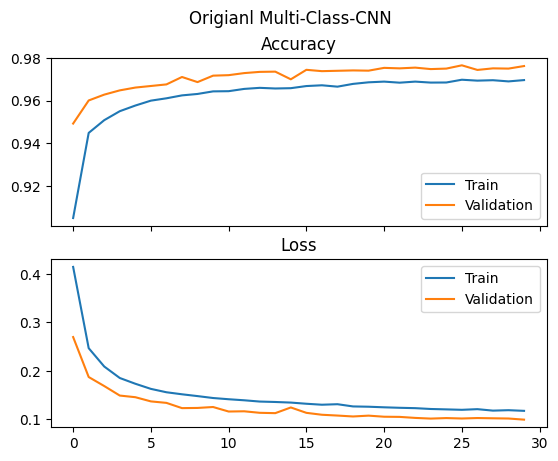

In [17]:
utils.evaluate('Origianl Multi-Class-CNN',og_res_multi_cnn,
                og_x_multi_test.reshape([og_x_multi_test.shape[0],187,1]),
                og_y_multi_test,is_multi=True,verbose=verbosity)

Time elapsed: 4.7s

#### Multi-Classification MLP Model without oversampling Results

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.94      0.56      0.70       556
         2.0       0.93      0.86      0.89      1448
         3.0       0.71      0.52      0.60       162
         4.0       0.99      0.91      0.95      1608

    accuracy                           0.97     21892
   macro avg       0.91      0.77      0.82     21892
weighted avg       0.97      0.97      0.96     21892

Origianl Multi-Class-MLP evaluation:
loss = 0.13959360122680664
accuarcy = 0.9660149812698364


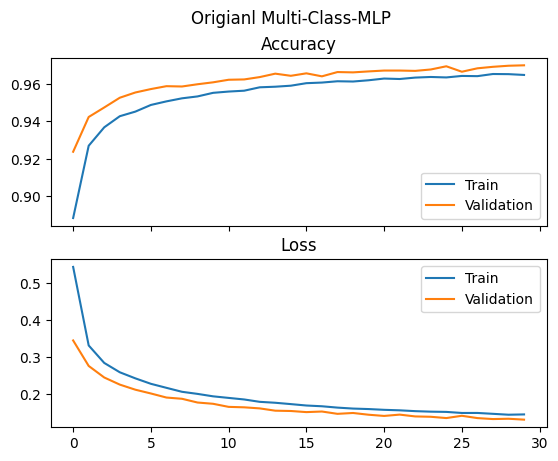

In [18]:
utils.evaluate('Origianl Multi-Class-MLP',og_res_multi_mlp,og_x_multi_test,og_y_multi_test,
                is_multi=True,verbose=verbosity)

Time elapsed: 1.8s

## Binary-Classification Results

### With oversampling

#### Binary-Classification CNN with oversampling Model Results

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       817
         1.0       0.99      0.99      0.99      2094

    accuracy                           0.99      2911
   macro avg       0.98      0.99      0.98      2911
weighted avg       0.99      0.99      0.99      2911

Binary-Class-CNN evaluation:
loss = 0.045121703296899796
accuarcy = 0.9869460463523865


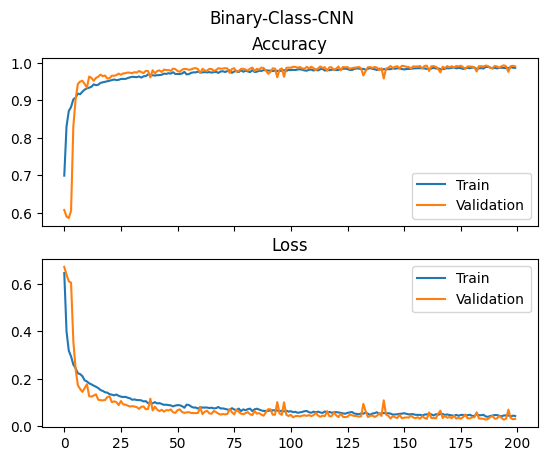

In [19]:
utils.evaluate('Binary-Class-CNN',res_bin_cnn,
                x_bin_test.reshape([x_bin_test.shape[0],187,1]),
                y_bin_test,is_multi=False,verbose=verbosity)

Time elapsed: 1.4s

#### Binary-Classification MLP with oversampling Model Results

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       817
         1.0       0.97      0.97      0.97      2094

    accuracy                           0.96      2911
   macro avg       0.95      0.95      0.95      2911
weighted avg       0.96      0.96      0.96      2911

Binary-Class-MLP evaluation:
loss = 0.1385340839624405
accuarcy = 0.9628993272781372


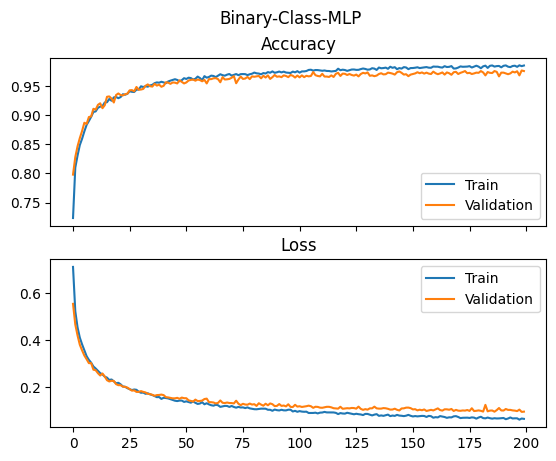

In [20]:
utils.evaluate('Binary-Class-MLP',res_bin_mlp,x_bin_test,
                y_bin_test,is_multi=False,verbose=verbosity)

Time elapsed: 0.6s

### Without oversampling

#### Binary-Classification CNN Model without oversampling Results

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       811
         1.0       0.99      0.98      0.99      2100

    accuracy                           0.98      2911
   macro avg       0.98      0.98      0.98      2911
weighted avg       0.98      0.98      0.98      2911

Original Binary-Class-CNN evaluation:
loss = 0.054733313620090485
accuarcy = 0.9828237891197205


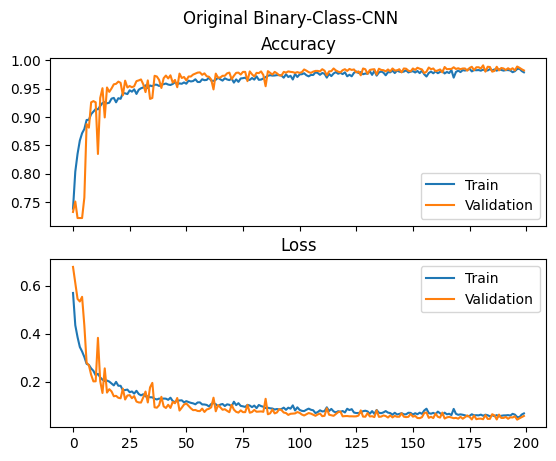

In [21]:
utils.evaluate('Original Binary-Class-CNN',og_res_bin_cnn,
                og_x_bin_test.reshape([og_x_bin_test.shape[0],187,1]),
                og_y_bin_test,is_multi=False,verbose=verbosity)

Time elapsed: 1.5s

#### Binary-Classification MLP Model without oversampling Results

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       811
         1.0       0.98      0.97      0.98      2100

    accuracy                           0.96      2911
   macro avg       0.95      0.96      0.96      2911
weighted avg       0.96      0.96      0.96      2911

Original Binary-Class-MLP evaluation:
loss = 0.15324220061302185
accuarcy = 0.9642734527587891


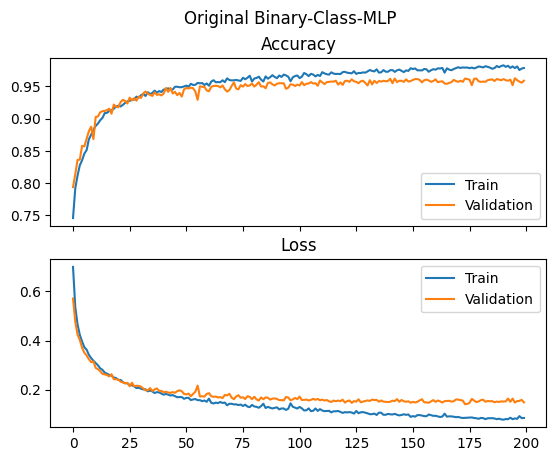

In [22]:
utils.evaluate('Original Binary-Class-MLP',og_res_bin_mlp,og_x_bin_test,
                og_y_bin_test,is_multi=False,verbose=verbosity)

Time elapsed: 0.6s